In [2]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset.

ds=pd.read_csv("Employee.csv", index_col=0, encoding="latin-1")
ds

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,4/8/2016,"$141,604",15%,United States,Seattle,10/16/2021
E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,11/29/1997,"$99,975",0%,China,Chongqing,NaN
E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,10/26/2006,"$163,099",20%,United States,Chicago,NaN
E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,9/27/2019,"$84,913",7%,United States,Chicago,NaN
E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,11/20/1995,"$95,409",0%,United States,Phoenix,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,9/18/2016,"$98,427",0%,United States,Columbus,NaN
E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,5/31/2010,"$47,387",0%,China,Chengdu,1/8/2018
E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,6/10/2019,"$176,710",15%,United States,Miami,NaN


In [27]:
ds.dtypes

,0
Full Name,object
Job Title,object
Department,object
Business Unit,object
Gender,object
Ethnicity,object
Age,int64
Hire Date,object
Annual Salary,object
Bonus %,object


In [4]:
# Converting the data ytpes into suitable ones.

ds["Annual Salary"]=ds["Annual Salary"].str.replace("[$,]","",regex=True)

ds["Bonus %"]=ds["Bonus %"].str.replace("[%]","",regex=True)

In [5]:
from datetime import datetime

ds["Exit Date"]=pd.to_datetime(ds["Exit Date"],format="%m/%d/%Y", errors="coerce")
ds["Hire Date"]=pd.to_datetime(ds["Hire Date"],format="%m/%d/%Y", errors="coerce")

ds["Exit Date"]=ds["Exit Date"].fillna(pd.Timestamp.today().normalize())

ds["Years Worked"]=ds["Exit Date"].dt.year-ds["Hire Date"].dt.year
print(ds["Years Worked"])

EEID
E02387     5
E04105    28
E02572    19
E02832     6
E01639    30
          ..
E03094     9
E01909     8
E04398     6
E02521    13
E03545     5
Name: Years Worked, Length: 1000, dtype: int32


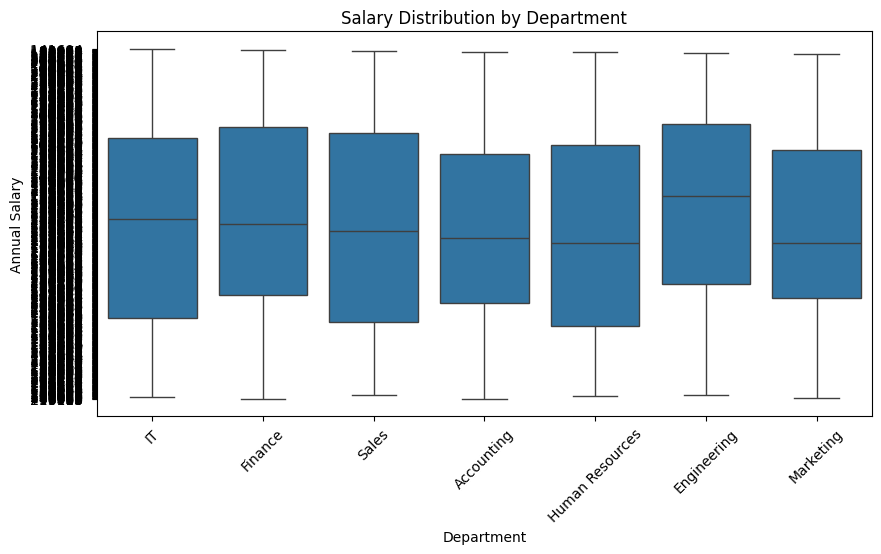

In [30]:
# Create a box plot to visualize the distribution of salaries in different departments.
# Identify which departments have the highest variance in salaries

plt.figure(figsize=(10,5))
sns.boxplot(x="Department", y="Annual Salary", data=ds)
plt.title("Salary Distribution by Department")
plt.xticks(rotation=45)
plt.show()

# This shows that the median salary of Engineering is higher compared to others.
# Whereas, the median salaries of Human resources and marketing is lower compared to others.

# Also, Finanace and Accounting have a smaller spread i.e., more consistent salaries.
# Whereas, IT and Engineering have a larger spread i.e., greater variability in salaries.

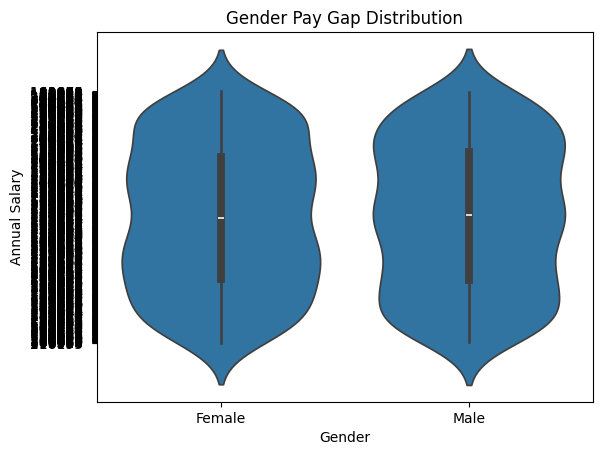

In [6]:
# Create a violin plot to compare salary distributions for men and women.
# Highlight any pay disparities.

sns.violinplot(x="Gender", y="Annual Salary", data=ds)
plt.title("Gender Pay Gap Distribution")
plt.show()

# The median salary of male seems to be more than female.
# Males salary seems to have a broader distribution, whereas, the distribution of female salary is more skewed.
# Female salary bulges at lower part meaning many women tend to earn that amount of salary.
# Men tend to earn higher salaries more than women.

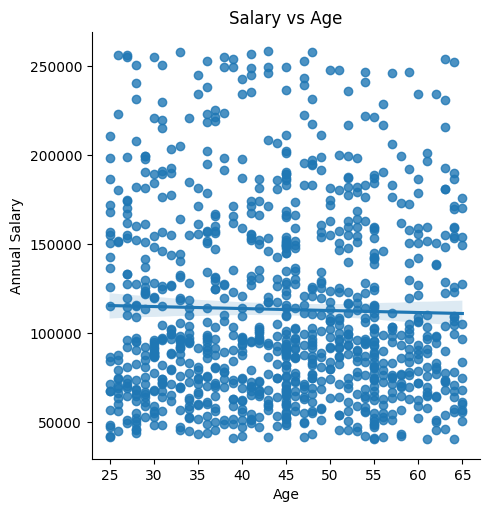

In [6]:
# Create a scatter plot to examine how salary varies with age.
# Add a regression line to observe trends.

ds["Annual Salary"]=pd.to_numeric(ds["Annual Salary"], errors='coerce').astype('Int64')
sns.lmplot(x="Age", y="Annual Salary", data=ds)
plt.title("Salary vs Age")
plt.show()

# Here, the fitted line is nearly flat, which shows there is no correlation between age and salary.
# So we can conclude that, higher age does not mean more salary.
# Also, some people earn above 250K. They might be outliers or leadership position holders.
# Salaries around 100K seems to be frequent across all age groups.

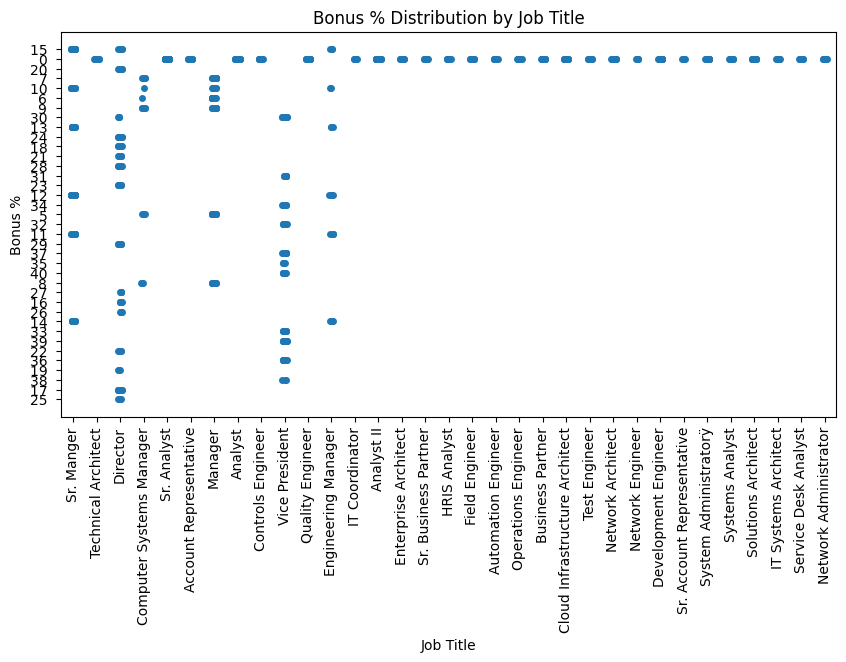

In [8]:
# Use a strip plot to visualize bonus percentages across different job titles.

plt.figure(figsize=(10, 5))
sns.stripplot(x='Job Title', y='Bonus %', data=ds, jitter=True)
plt.xticks(rotation=90)
plt.title("Bonus % Distribution by Job Title")
plt.show()

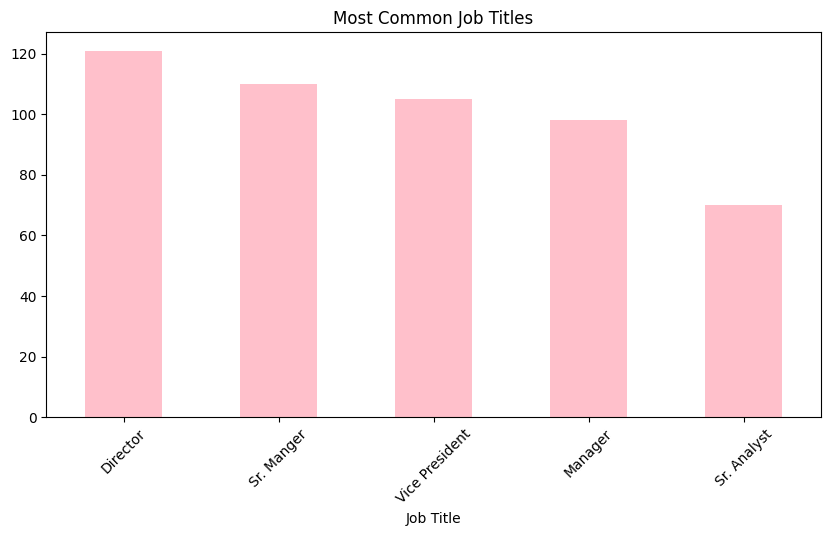

In [9]:
# Use a bar chart to visualize the most common job titles.

common=ds["Job Title"].value_counts().head(5)

plt.figure(figsize=(10,5))
#sns.barplot(x=common.index, y=common.values)
common.plot(kind="bar", color="pink")
plt.title("Most Common Job Titles")
plt.xticks(rotation=45)
plt.show()

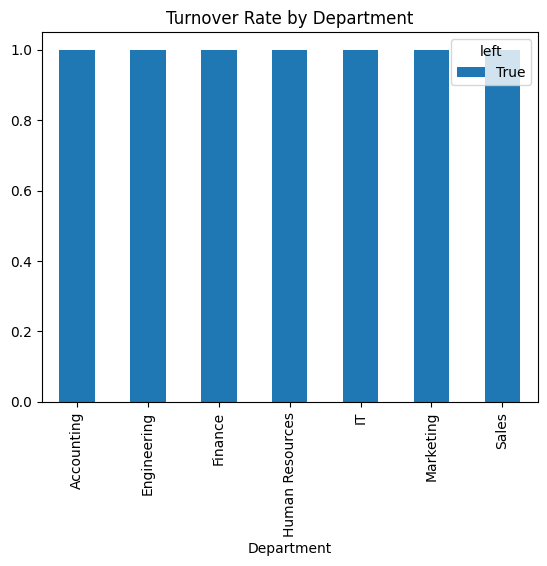

In [10]:
# Use a stacked bar chart to compare the number of employees who left vs those still working.

ds['left'] = ds['Exit Date'].notna()
turnover = ds.groupby('Department')['left'].value_counts(normalize=True).unstack()
turnover.plot(kind='bar', stacked=True)
plt.title("Turnover Rate by Department")
plt.show()

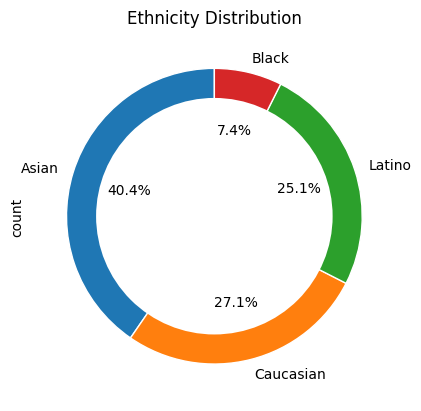

In [11]:
# Use a donut chart to visualize the diversity of employees by ethnicity.

ethnic_groups=ds["Ethnicity"].value_counts()
ethnic_groups.plot.pie(labels=ethnic_groups.index, autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor":"white"})
plt.gca().add_artist(plt.Circle((0,0), 0.8, fc='white'))
# 0.8 is the thickness of the ring.

plt.title("Ethnicity Distribution")
plt.show()

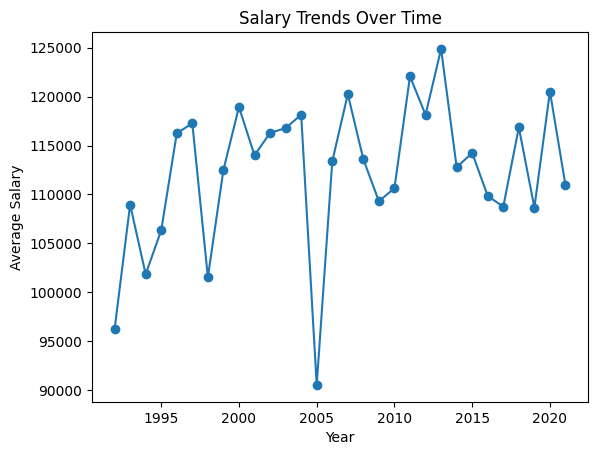

In [7]:
# Use a line chart to observe the trend in average salary over hire years.

ds['Hire Year'] =pd.to_datetime(ds['Hire Date']).dt.year
ds['Annual Salary'] = pd.to_numeric(ds['Annual Salary'], errors='coerce').astype(int).fillna(0)

salary_trend = ds.groupby('Hire Year')['Annual Salary'].mean()
salary_trend.plot(kind='line', marker='o')
plt.title("Salary Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.show()

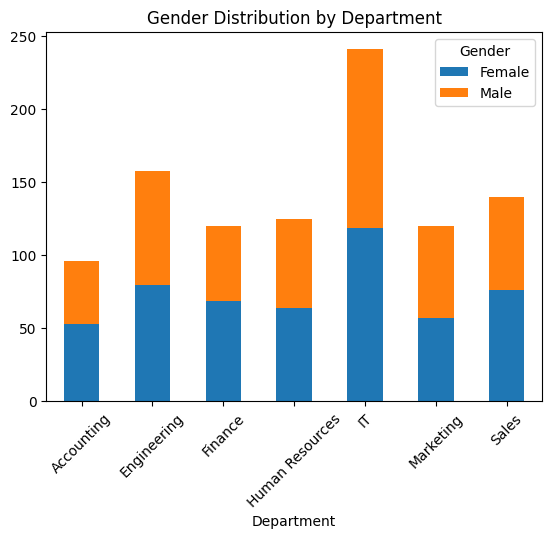

In [13]:
# Use a grouped bar chart to visualize the gender distribution in each department.

gender_dept = ds.groupby(['Department', 'Gender']).size().unstack()
gender_dept.plot(kind='bar', stacked=True)
plt.title("Gender Distribution by Department")
plt.xticks(rotation=45)
plt.show()

# We can see that IT department has the highest number of employees.
# Further, most departments seems to have more women than men.

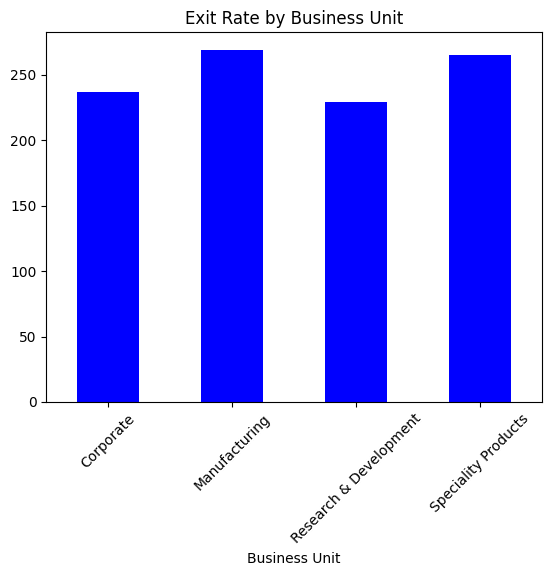

In [16]:
# Use a bar chart to show which business units have the highest exit rates.

exit_rate=ds["Exit Date"].notna()
exit=ds[exit_rate].groupby("Business Unit").size()
exit.plot(kind="bar", color="blue")
plt.title("Exit Rate by Business Unit")
plt.xticks(rotation=45)
plt.show()

# We can see that manufacturing has the highest exit rate.


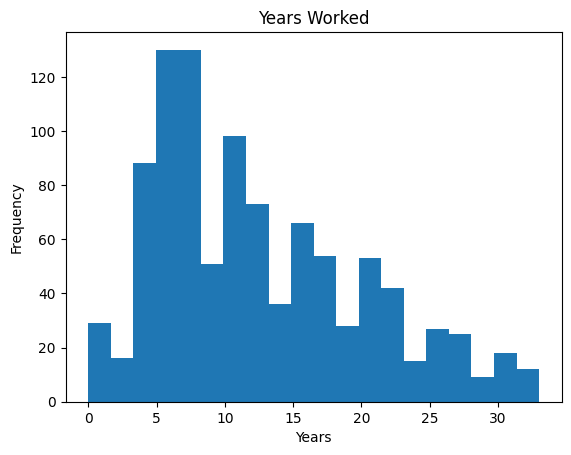

In [14]:
# Use a histogram to visualize how long employees stay before exiting.

ds["Years Worked"].plot(kind="hist",bins=20)
plt.title("Years Worked")
plt.xlabel("Years")
plt.show()

# We can see that most employees have worked for 5-10 years.

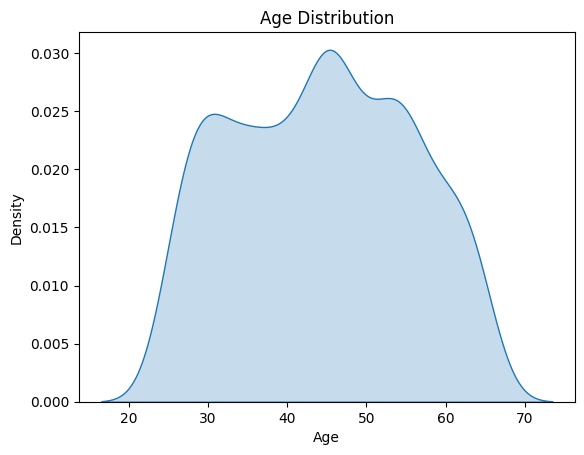

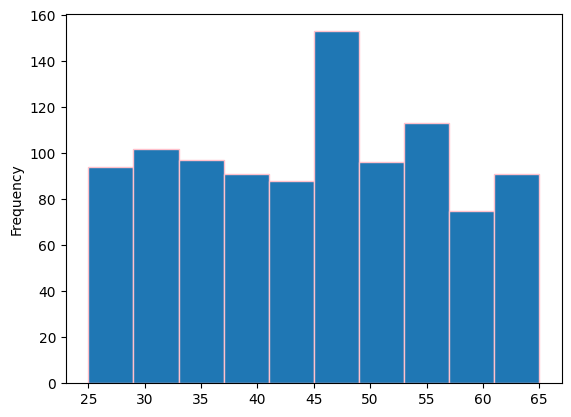

In [19]:
# Use a kde plot to show the distribution of employee ages.

sns.kdeplot(ds["Age"],fill=True)
plt.title("Age Distribution")
plt.show()

ds["Age"].plot(kind="hist", bins=10, edgecolor="pink")
plt.show()

# We can see that most employees ae between age 45-50.

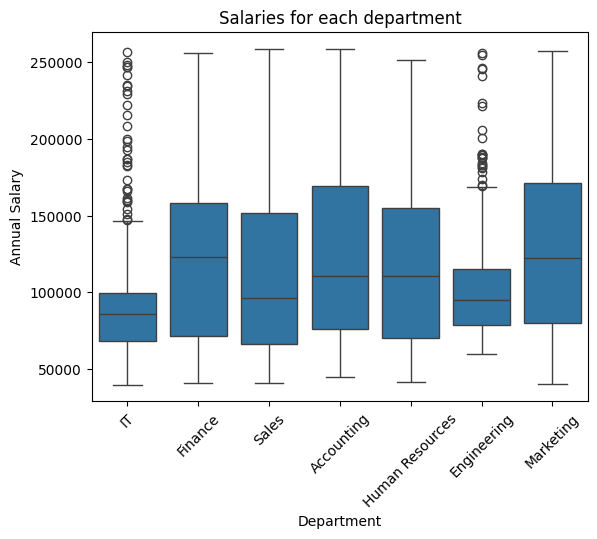

In [21]:
# Use a boxplot to identify salary outliers for each department.

sns.boxplot(x="Department", y="Annual Salary", data=ds)
plt.title("Salaries for each department")
plt.xticks(rotation=45)
plt.show()

# The circles represent the outliers.

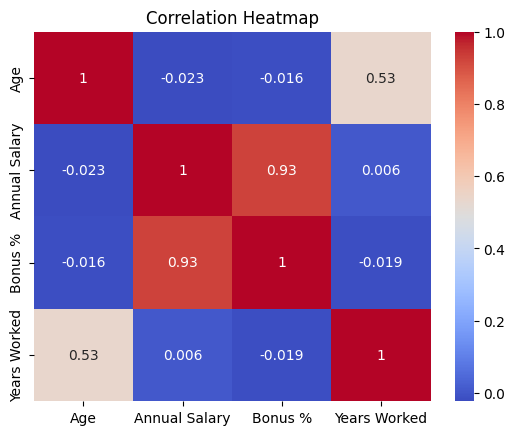

In [31]:
# Use a heatmap to find correlations between age, salary, bonus, and years of service.

corr_matrix = ds[['Age', 'Annual Salary', 'Bonus %', 'Years Worked']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# blue=negative corr, red=positive corr.
# As age increases, years worked increses.

plt.title("Correlation Heatmap")
plt.show()

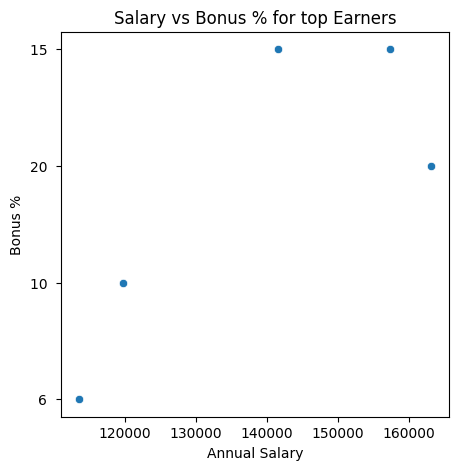

In [41]:
# Use a scatter plot to observe salary and bonus percentage relationships for the highest earners.

high_earners=ds[ds["Annual Salary"]>100000].head(5)
plt.figure(figsize=(5,5))
sns.scatterplot(x="Annual Salary",y="Bonus %",data=high_earners)
plt.title("Salary vs Bonus % for top Earners")
plt.show()

# We can see that as the annual salary incraeses the bonus also incraeses but after a certain point it becomes average.

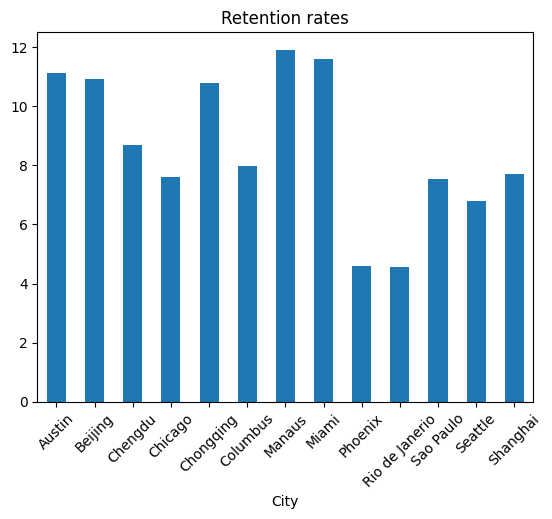

In [51]:
# Use a bar chart to compare retention rates across different cities.

ds["Retention"] = ds["Exit Date"].notna()
ret_rate = ds.groupby('City')["Retention"].mean() * 100
ret_rate.plot(kind="bar")
plt.title("Retention rates")
plt.xticks(rotation=45)
plt.show()

# We can see that retention rate is higher in Manaus.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 36.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 24.7% of the points cannot be place

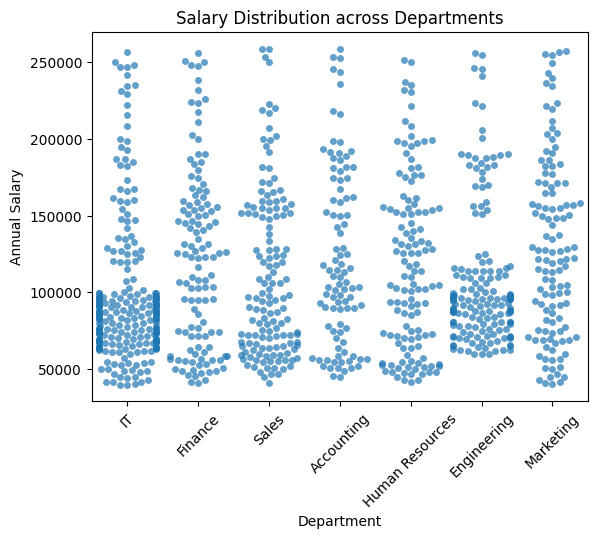

In [13]:
# Use a swarm plot to analyze salary distributions and gaps within each department.

sns.swarmplot(x="Department", y="Annual Salary", data=ds, alpha=0.7)
# alpha is how transaprent the points would be.
# swarm plot displys each data point as an indvidual dot preventing the overlapping.
# We can see the potential gaps between salaries of each department.

plt.title("Salary Distribution across Departments")
plt.xticks(rotation=45)
plt.show()

# We can see that for IT and engineering most people re paid between 50K to 100K.

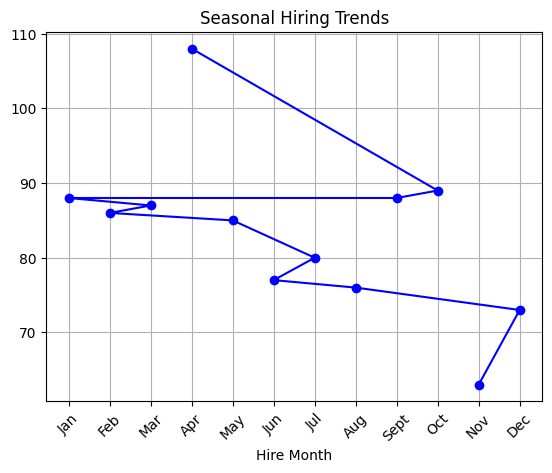

In [23]:
# Use a line chart to examine seasonal hiring trends.

# Using value_counts()
# It is mainly used without groupby() and strictly in a Series.
# It counts only the unique value in a Series.
# It excludes NaN values.
# Series is sorted by counts.
# We can see that the line is drawn for high to low.

ds["Hire Month"]=ds["Hire Date"].dt.month

monthly_hiring=ds["Hire Month"].value_counts()

monthly_hiring.plot(kind="line", marker="o", color="blue")
plt.title("Seasonal Hiring Trends")
plt.xticks(rotation=45, ticks=range(1,13),labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"])
plt.grid(True)
plt.show()



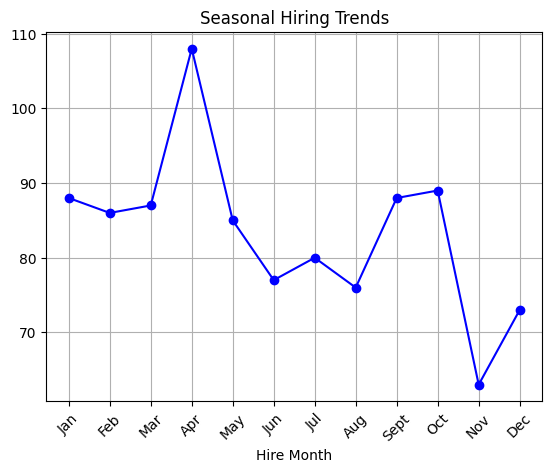

In [24]:
# Using size()
# It is mainly used with data frames and series.
# It counts all the elements in the data frame or series.
# It includes NaN values.
# Th output is series or integer.

ds["Hire Month"]=ds["Hire Date"].dt.month

monthly_hiring=ds.groupby("Hire Month").size()

monthly_hiring.plot(kind="line", marker="o", color="blue")
plt.title("Seasonal Hiring Trends")
plt.xticks(rotation=45, ticks=range(1,13),labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"])
plt.grid(True)
plt.show()

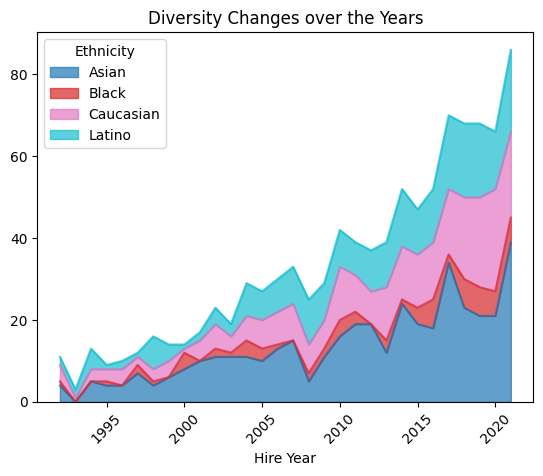

In [27]:
# Use a stacked area chart to visualize diversity shifts in hiring over time.

ds["Hire Year"]=ds["Hire Date"].dt.year

diversity=ds.groupby(["Hire Year","Ethnicity"]).size().unstack()
# unstack() reshapes data into a table format where ethnicities become columns.

diversity.plot(kind="area",stacked=True, alpha=0.7, colormap="tab10")
plt.title("Diversity Changes over the Years")
plt.xticks(rotation=45)
plt.show()

# The total height of the stacked area represents the number of people hired that year.
# From the chart, we can see that, more Asians are being hired as the year progresses.
# Whereas, less number of Latinos and Black people were hired in the recent years.

<ipython-input-33-22ad4852fc0c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exit= ds[ds['Exit Date'].notna()].groupby('age_group').size() / ds.groupby('age_group').size() * 100
<ipython-input-33-22ad4852fc0c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exit= ds[ds['Exit Date'].notna()].groupby('age_group').size() / ds.groupby('age_group').size() * 100


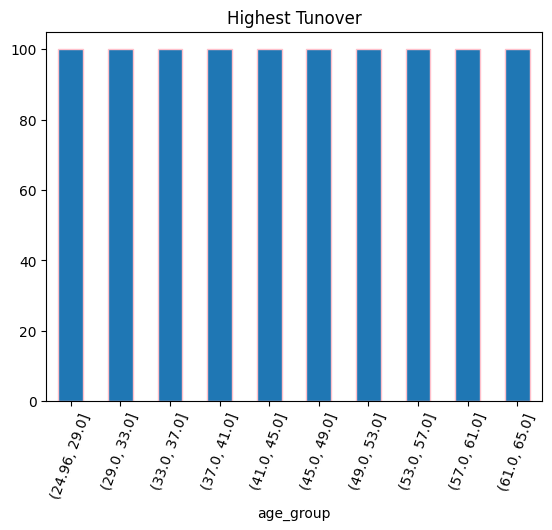

In [33]:
# Use a bar chart to show which age groups have the highest turnover.

ds['age_group'] = pd.cut(ds['Age'],bins=10)

# Calculate exit rate per age group
exit= ds[ds['Exit Date'].notna()].groupby('age_group').size() / ds.groupby('age_group').size() * 100

exit.plot(kind="bar",edgecolor="pink")
plt.title("Highest Tunover")
plt.xticks(rotation=70)
plt.show()

# The higher the bar, the higher is the exit rate.

In [ ]:
# These advanced visualizations help in hiring decisions, salary analysis, retention strategies, and diversity insights.